I recommend to view the file 


# PREDICTING COVID-19 MORTALITY

# [1- Loading basic libraries](#1)

# [2- Data analysis](#2)
 - ## [A- Gender](#2.A)
     - ### [A.1- Sub-analysis Cured/Death](#2.A.1)
     - ### [A.2- Sub-analysis Age by Gender](#2.A.2)
     - ### [A.3- Sub-analysis Age by Hospitalized](#2.A.3)
     - ### [A.4- Sub-analysis Age by Evolution](#2.A.4)
 - ## [B- Tests](#2.B)
 - ## [C- Symptoms](#2.C)
 - ## [D- Symptoms](#2.D)
 - ## [E- Delta_DeathReg](#2.E)
 - ## [F- Hospitalized](#2.F)
 - ## [G- Pregnant](#2.G)
 - ## [H- Race](#2.H)
 - ## [I- Cases by date](#2.I)
 - ## [J- Correlations](#2.J)
 
# [3- Conclusion](#3)

<a id='1'></a>

---

# 1. Loading basic libraries

In [121]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.express as px

<a id='2'></a>

# 2. Analysis

For the following analysis, the following inclusion criteria were taken into account:

    - Age >= 18 years
    - Patients with Covid-19 confirmed by Rapid Test or PCR Test
    - Closed patients, ie "Evolution == Cured" or "Evolution == Death"

In [3]:
df_covid = pd.read_csv("df_to_analize.csv", encoding = "latin-1", index_col = 0, parse_dates = ["Register_date", "Diagnosis_date", "Death_date"])
df_covid.head(2)

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Race,...,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag,Delta_DeathReg,Age,n_comor,n_symp
0,2021-11-11,2021-11-10,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,Brown,...,No,No,No,No,No,1,NaN,39.0,0,6
1,2021-11-10,2021-11-08,NaT,Positive,NaN,Confirmed,No,Cured,Masculine,White,...,No,No,No,No,No,2,NaN,24.0,0,4


In [4]:
df_covid.columns

Index(['Register_date', 'Diagnosis_date', 'Death_date', 'Result_PCR',
       'Result_RapidTest', 'Classification', 'Hospitalized', 'Evolution',
       'Gender', 'Race', 'Pregnant', 'Disabled', 'Fever', 'Breath_difficulty',
       'Cough', 'Rhinitis', 'Throat_pain', 'Diarrhea', 'Headache',
       'Comorbidity_pulmonary', 'Comorbidity_cardiac', 'Comorbidity_renal',
       'Comorbidity_diabetes', 'Comorbidity_smoking', 'Comorbidity_obesity',
       'Delta_RegDiag', 'Delta_DeathReg', 'Age', 'n_comor', 'n_symp'],
      dtype='object')

In [5]:
df_covid.shape

(384498, 30)

In [6]:
print(f"{df_covid.shape[0]:,} patients were included.")

384,498 patients were included.


<a id='2.A'></a>

## 2.A Gender

In [7]:
gender_abs = df_covid["Gender"].value_counts().sort_values()
gender_pct = df_covid["Gender"].value_counts(normalize = True).sort_values().round(2) * 100

In [8]:
gender_abs

Masculine    178597
Femenine     205832
Name: Gender, dtype: int64

In [9]:
gender_pct

Masculine    46.0
Femenine     54.0
Name: Gender, dtype: float64

In [10]:
def addlabels_abs(a, b):
    for i in range(len(a)):
        plt.text(a.index[i], b[i] + 0.5, '{:,}'.format(a[i]), ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))

In [11]:
def addlabels_pct(x):
    for i in range(len(x)):
        plt.text(x.index[i], x[i] / 2, x[i].round(2).astype("str") + "%", ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))

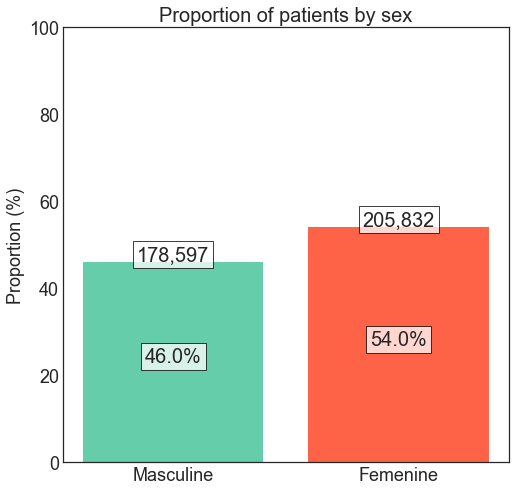

In [12]:
plt.style.use("seaborn-white")
sns.set_palette("vlag")
fig, ax = plt.subplots(figsize = (8, 8))

colors = ["mediumaquamarine", "tomato"]
ax.bar(gender_pct.index, gender_pct, color = colors)

plt.ylabel("Proportion (%)", fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(ticks = ["Masculine", "Femenine"], labels = ["Masculine", "Femenine"], fontsize = 18)
plt.title("Proportion of patients by sex", fontsize = 20)
plt.ylim(0, 100)

addlabels_abs(gender_abs, gender_pct)
addlabels_pct(gender_pct)

plt.show()

<a id='2.A.1'></a>

### 2.A.1 Sub-analysis Cured/Death

A dataframe `Evolution = Death` is created:

In [13]:
mask_live = df_covid["Evolution"] == "Cured"
df_covid_death = df_covid[~mask_live]
df_covid_death.shape

(7690, 30)

In [14]:
abs_death = df_covid_death.shape[0]
pct_death = df_covid_death.shape[0] / df_covid.shape[0] * 100
print(f"Of the included patients {pct_death:.2f}% ({df_covid_death.shape[0]:,}) died.")

Of the included patients 2.00% (7,690) died.


In [15]:
gender_abs_death = df_covid_death["Gender"].value_counts().sort_values(ascending = False)
gender_pct_death = df_covid_death["Gender"].value_counts(normalize = True).round(2) * 100

In [16]:
gender_abs_death

Masculine    4310
Femenine     3380
Name: Gender, dtype: int64

In [17]:
gender_pct_death

Masculine    56.0
Femenine     44.0
Name: Gender, dtype: float64

In [18]:
print(f"Of 2% of patients who died {gender_pct_death[0]:.2f}% ({gender_abs_death[0]:,}) were male.")

Of 2% of patients who died 56.00% (4,310) were male.


A dataframe `Evolution = Cured` is created:

In [19]:
mask_live = df_covid["Evolution"] == "Cured"
df_covid_live = df_covid[mask_live]
df_covid_live.shape

(376808, 30)

In [20]:
gender_abs_live = df_covid_live["Gender"].value_counts().sort_values()
gender_pct_live = df_covid_live["Gender"].value_counts(normalize = True).sort_values().round(2) * 100

In [21]:
def addlabels_abs_ax(a, b, n):
    for i in range(len(a)):
        ax[n].text(a.index[i], b[i] + 0.5, '{:,}'.format(a[i]), ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))

In [22]:
def addlabels_pct_ax(x, n):
    for i in range(len(x)):
        ax[n].text(x.index[i], x[i] / 2, x[i].round(2).astype("str") + "%", ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))

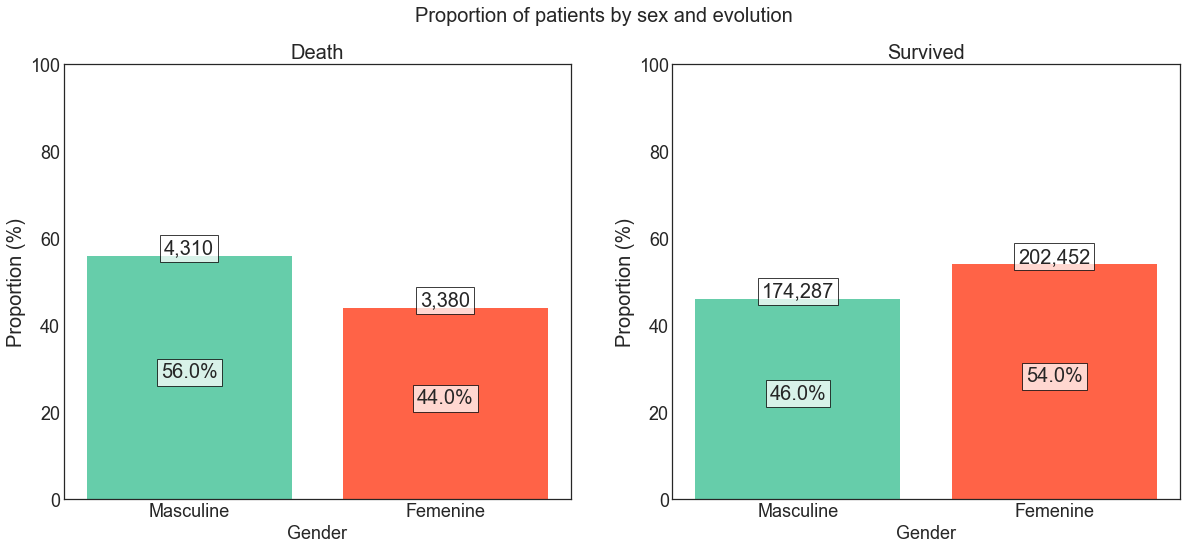

In [23]:
sns.set_palette("vlag")
plt.style.use("seaborn-white")

# Create the figure and the axis
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

# Graphs
colors = ["mediumaquamarine", "tomato"]
ax[0].bar(gender_pct_death.index, gender_pct_death, color = colors)
ax[1].bar(gender_pct_live.index, gender_pct_live, color = colors)

# Title, labels, ticks for ax[0]
ax[0].set_ylabel("Proportion (%)", fontsize = 20)
ax[0].set_xlabel("Gender", fontsize = 18)
ax[0].set_xticks(ticks = ["Masculine", "Femenine"], labels = ["Masculine", "Femenine"], fontsize = 18)
ax[0].set_yticks(ticks = np.arange(0, 120, 20), labels = np.arange(0, 120, 20), fontsize = 18)
ax[0].set_title("Death", fontsize = 20)
ax[0].set_ylim((0, 100))

addlabels_abs_ax(gender_abs_death, gender_pct_death, 0)
addlabels_pct_ax(gender_pct_death, 0)

# Title, labels, ticks for ax[1]
ax[1].set_ylabel("Proportion (%)", fontsize = 20)
ax[1].set_xlabel("Gender", fontsize = 18)
ax[1].set_xticks(ticks = ["Masculine", "Femenine"], labels = ["Masculine", "Femenine"], fontsize = 18)
ax[1].set_yticks(ticks = np.arange(0, 120, 20), labels = np.arange(0, 120, 20), fontsize = 18)
ax[1].set_title("Survived", fontsize = 20)
ax[1].set_ylim((0, 100))

addlabels_abs_ax(gender_abs_live, gender_pct_live, 1)
addlabels_pct_ax(gender_pct_live, 1)

plt.suptitle("Proportion of patients by sex and evolution", fontsize = 20)

plt.show()

The ratio changes and more men die than women despite having more women in the dataframe.

<a id='2.A.2'></a>

### 2.A.2 Sub-analysis Age by Gender

In [24]:
mask_M = df_covid["Gender"] == "Masculine"
masculine = df_covid[mask_M]

mask_F = df_covid["Gender"] == "Femenine"
femenine = df_covid[mask_F]

In [25]:
median_fem = femenine["Age"].median()
median_masc = masculine["Age"].median()

percentile25_fem = np.percentile(femenine["Age"], 25)
percentile25_masc = np.percentile(masculine["Age"], 25)

percentile75_fem = np.percentile(femenine["Age"], 75)
percentile75_masc = np.percentile(masculine["Age"], 75)

print(f"Median age for women was {median_fem} {(percentile25_fem, percentile75_fem)}")
print(f"Median age for men was {median_masc} {(percentile25_masc, percentile75_masc)}")

Median age for women was 40.0 (30.0, 52.0)
Median age for men was 40.0 (30.0, 52.0)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_11432\1111184816.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(labels = yticks, fontsize = 16)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11432\1111184816.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(labels = xticks, fontsize = 16)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11432\1111184816.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels = [0,20,40,60,80,100], fontsize = 14)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11432\1111184816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels = yticks, fontsize = 16)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11432\1111184816.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels = xticks, fontsiz

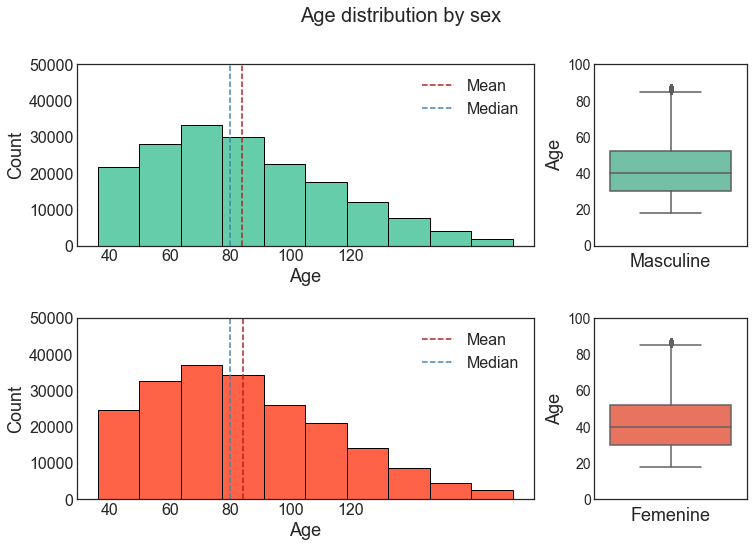

In [26]:
plt.style.use("seaborn-white")
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)
 
spec = gridspec.GridSpec(ncols = 2, nrows = 2, width_ratios = [3, 1], wspace = 0.2, hspace = 0.4)

#Histogram masculine
ax0 = fig.add_subplot(spec[0,0])
ax0.hist(masculine["Age"], color = "mediumaquamarine", edgecolor = "black") 

ax0.set_xlabel("Age", fontsize = 18) 
ax0.set_ylabel("Count", fontsize = 18) 
yticks = list(range(0, 90000, 10000))
ax0.set_yticklabels(labels = yticks, fontsize = 16) 
xticks = list(range(20, 140, 20))
ax0.set_xticklabels(labels = xticks, fontsize = 16) 
ax0.set_ylim(0, 50000)

ax0.axvline(x = masculine["Age"].mean(), color = "firebrick", linestyle = "--", label = "Mean")
ax0.axvline(x = masculine["Age"].median(), color = "steelblue", linestyle = "--", label = "Median")
ax0.legend(fontsize = 16)

# Boxplot masculine
ax1 = fig.add_subplot(spec[0,1])
ax1 = sns.boxplot(x = "Gender", y = "Age", data = masculine, color = "mediumaquamarine") 

ax1.set_ylabel("Age", fontsize = 18)
ax1.set_xlabel("Masculine", fontsize = 18)
ax1.set_xticklabels([""])
ax1.set_yticklabels(labels = [0,20,40,60,80,100], fontsize = 14) 
ax1.set_ylim(0, 100)

#Histogram femenine
ax2 = fig.add_subplot(spec[1,0])
ax2.hist(femenine["Age"], color = "tomato", edgecolor = "black") 

ax2.set_xlabel("Age", fontsize = 18) 
ax2.set_ylabel("Count", fontsize = 18) 
yticks = list(range(0, 90000, 10000))
ax2.set_yticklabels(labels = yticks, fontsize = 16) 
xticks = list(range(20, 140, 20))
ax2.set_xticklabels(labels = xticks, fontsize = 16) 
ax2.set_ylim(0, 50000)

ax2.axvline(x = femenine["Age"].mean(), color = "firebrick", linestyle = "--", label = "Mean")
ax2.axvline(x = femenine["Age"].median(), color = "steelblue", linestyle = "--", label = "Median")
ax2.legend(fontsize = 16)

# Boxplot femenine
ax3 = fig.add_subplot(spec[1,1])
ax3 = sns.boxplot(x = "Gender", y = "Age", data = femenine, color = "tomato") 

ax3.set_ylabel("Age", fontsize = 18)
ax3.set_xlabel("Femenine", fontsize = 18)
ax3.set_xticklabels([""])
ax3.set_yticklabels(labels = [0,20,40,60,80,100], fontsize = 14) 
ax3.set_ylim(0, 100)

plt.suptitle("Age distribution by sex", fontsize = 20)

plt.show()

<a id='2.A.3'></a>

### 2.A.3 Sub-analysis Age by Hospitalized

In [27]:
abs_hosp = df_covid[df_covid["Hospitalized"] == "Yes"].shape[0]
pct_hosp = df_covid[df_covid["Hospitalized"] == "Yes"].shape[0] / df_covid.shape[0] * 100 

print(f"Of the included patients {pct_hosp:.2f}% ({abs_hosp:,}) were hospitalized.")

Of the included patients 1.55% (5,955) were hospitalized.


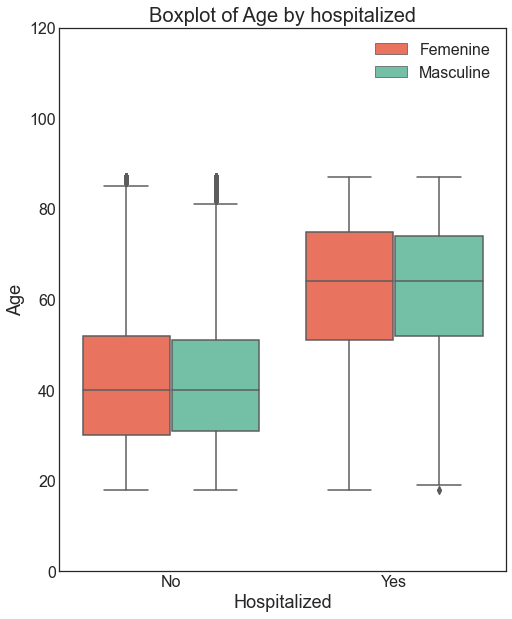

In [28]:
fig, ax = plt.subplots(figsize = (8,10))
plt.style.use("seaborn-white")
colours = ["#ff6347", "#66CDAA"]
sns.set_palette(sns.color_palette(colours))

sns.boxplot(x = "Hospitalized", y = "Age", data = df_covid, hue = "Gender")

plt.title("Boxplot of Age by hospitalized", fontsize = 20)
plt.xlabel("Hospitalized", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Age", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 120)

plt.legend(fontsize = 16)

plt.show()

In [29]:
median_hosp = df_covid[df_covid["Hospitalized"] == "Yes"]["Age"].median()

percentile25_hosp = np.percentile(df_covid[df_covid["Hospitalized"] == "Yes"]["Age"], 25)

percentile75_hosp = np.percentile(df_covid[df_covid["Hospitalized"] == "Yes"]["Age"], 75)

print(f"The median of age of the patients who were hospitalized was {median_hosp:.2f} {(percentile25_hosp, percentile75_hosp)}")

The median of age of the patients who were hospitalized was 64.00 (52.0, 74.0)


Hospitalized patients were older without differences between gender.

<a id='2.A.4'></a>

### 2.A.4 Sub-analysis Age by Evolution

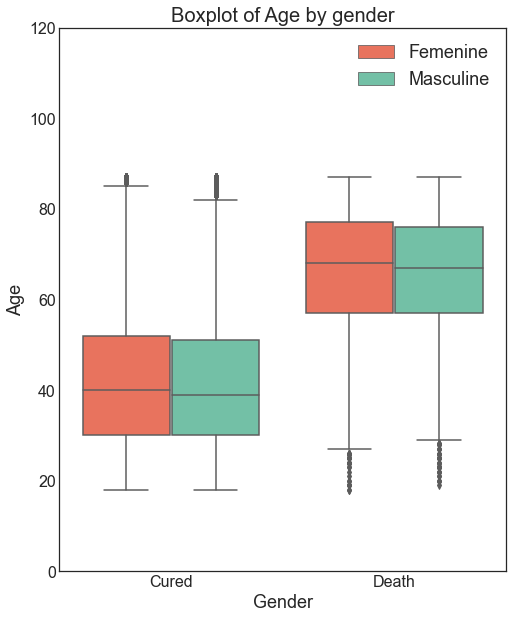

In [30]:
fig, ax = plt.subplots(figsize = (8,10))
plt.style.use("seaborn-white")
colours = ["#ff6347", "#66CDAA"]
sns.set_palette(sns.color_palette(colours))

sns.boxplot(x = "Evolution", y = "Age", data = df_covid, hue = "Gender")

plt.title("Boxplot of Age by gender", fontsize = 20)
plt.xlabel("Gender", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Age", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 120)

plt.legend(fontsize = 18)

plt.show()

In [31]:
median_evol = df_covid[df_covid["Evolution"] == "Death"]["Age"].median()

percentile25_evol = np.percentile(df_covid[df_covid["Evolution"] == "Death"]["Age"], 25)

percentile75_evol = np.percentile(df_covid[df_covid["Evolution"] == "Death"]["Age"], 75)

print(f"The median of age of the patients who die was {median_evol:.2f} {(percentile25_evol, percentile75_evol)}")

The median of age of the patients who die was 68.00 (57.0, 76.0)


Patients who died were older without differences between gender.

<a id='2.B'></a>

## 2.B Tests

In [32]:
df_covid.columns

Index(['Register_date', 'Diagnosis_date', 'Death_date', 'Result_PCR',
       'Result_RapidTest', 'Classification', 'Hospitalized', 'Evolution',
       'Gender', 'Race', 'Pregnant', 'Disabled', 'Fever', 'Breath_difficulty',
       'Cough', 'Rhinitis', 'Throat_pain', 'Diarrhea', 'Headache',
       'Comorbidity_pulmonary', 'Comorbidity_cardiac', 'Comorbidity_renal',
       'Comorbidity_diabetes', 'Comorbidity_smoking', 'Comorbidity_obesity',
       'Delta_RegDiag', 'Delta_DeathReg', 'Age', 'n_comor', 'n_symp'],
      dtype='object')

It is common for rapid tests to be negative and PCR positive.

In [33]:
df_covid_tests = df_covid[["Result_RapidTest", "Result_PCR", "Classification"]]
print("Shape:", df_covid_tests.shape)
df_covid_tests.head(2)

Shape: (384498, 3)


,Result_RapidTest,Result_PCR,Classification
0,NaN,Positive,Confirmed
1,NaN,Positive,Confirmed


In [34]:
df_covid_tests.isna().sum()

Result_RapidTest    136047
Result_PCR          229800
Classification           0
dtype: int64

In [37]:
mask_testrapido_null = df_covid_tests["Result_RapidTest"].isna()
mask_PCR_null = df_covid_tests["Result_PCR"].isna()

pct_at_least_null = round((df_covid_tests[mask_testrapido_null | mask_PCR_null].shape[0] / df_covid_tests.shape[0] * 100), 2)
print(f"Percentage of patients who have at least one of the two tests as null: {pct_at_least_null}%")

Percentage of patients who have at least one of the two tests as null: 95.15%


In [38]:
df_covid_tests_without_na = df_covid_tests.dropna()

In [39]:
df_covid_tests_without_na.shape

(18651, 3)

In [40]:
mask_testrapido_positive = df_covid_tests_without_na["Result_RapidTest"] == "Positive"
mask_PCR_negative = df_covid_tests_without_na["Result_PCR"] == "Negative"

print("Number of patients with positive Result_RapidTest and negative Result_PCR:", df_covid_tests_without_na[mask_testrapido_positive & mask_PCR_negative].shape[0])
print("Percentage of patients with positive Result_RapidTest and negative Result_PCR:", round((df_covid_tests_without_na[mask_testrapido_positive & mask_PCR_negative].shape[0] / df_covid_tests_without_na.shape[0] * 100), 2), "%")

Number of patients with positive Result_RapidTest and negative Result_PCR: 7954
Percentage of patients with positive Result_RapidTest and negative Result_PCR: 42.65 %


Summarizing:

- 95% of the patients had at least one of the two tests as null data.

- Of the remaining 5%, 42% had a positive rapid test and a negative PCR, something that is noteworthy.

<a id='2.C'></a>

## 2.C Symptoms

In [41]:
df_covid.columns

Index(['Register_date', 'Diagnosis_date', 'Death_date', 'Result_PCR',
       'Result_RapidTest', 'Classification', 'Hospitalized', 'Evolution',
       'Gender', 'Race', 'Pregnant', 'Disabled', 'Fever', 'Breath_difficulty',
       'Cough', 'Rhinitis', 'Throat_pain', 'Diarrhea', 'Headache',
       'Comorbidity_pulmonary', 'Comorbidity_cardiac', 'Comorbidity_renal',
       'Comorbidity_diabetes', 'Comorbidity_smoking', 'Comorbidity_obesity',
       'Delta_RegDiag', 'Delta_DeathReg', 'Age', 'n_comor', 'n_symp'],
      dtype='object')

In [42]:
symptoms_pro = np.round((df_covid["n_symp"].value_counts().sort_index() / df_covid.shape[0]) * 100, 2)
symptoms_pro

0    15.23
1    12.18
2    23.51
3    23.94
4    15.36
5     7.15
6     2.24
7     0.38
Name: n_symp, dtype: float64

- Almost half of the patients have between 2 and 3 symptoms.
- 15% of patients do not have any symptoms.

Creation of the dataframe to graph.

In [43]:
symptoms_pro2 = df_covid.groupby("n_symp")[["n_symp"]].count() / df_covid.shape[0] * 100
symptoms_pro2.columns = ["Percentage"]
symptoms_pro2 = symptoms_pro2.sort_values(by = "Percentage", ascending = True).round(2)
symptoms_pro2  

,Percentage
n_symp,
7,0.38
6,2.24
5,7.15
1,12.18
0,15.23
4,15.36
2,23.51
3,23.94


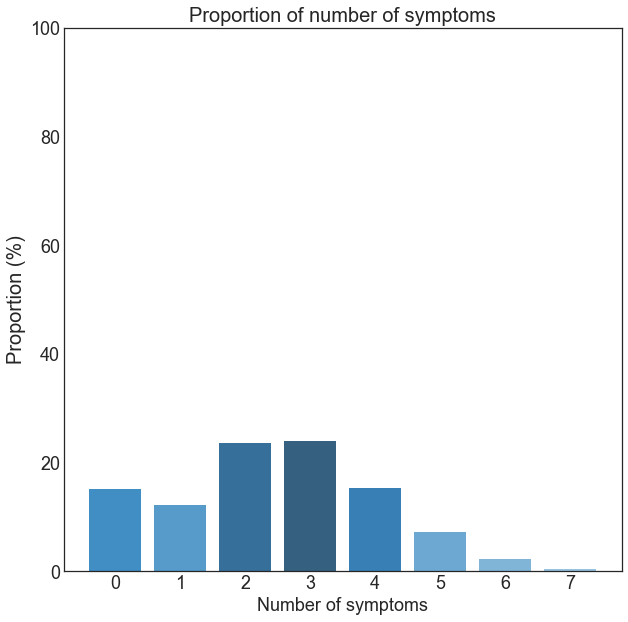

In [44]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize = (10, 10))

ax.bar(symptoms_pro2.index, symptoms_pro2["Percentage"], color = sns.color_palette("Blues_d", 10))

plt.ylabel("Proportion (%)", fontsize = 20)
plt.xlabel("Number of symptoms", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Proportion of number of symptoms", fontsize = 20)
plt.ylim(0, 100)

plt.show()

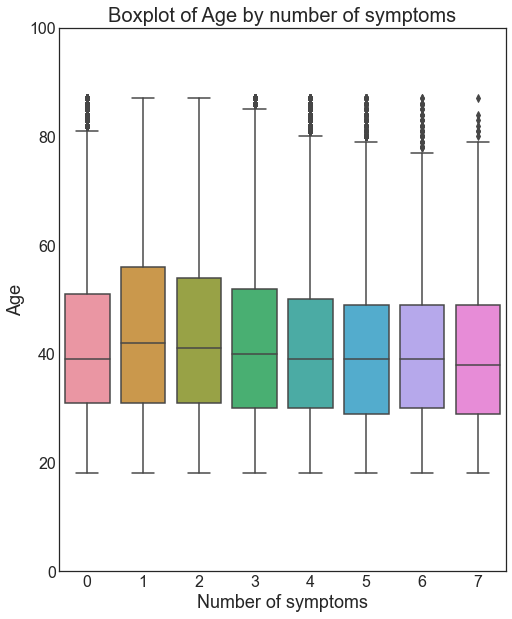

In [45]:
fig, ax = plt.subplots(figsize = (8,10))
plt.style.use("seaborn-white")

sns.boxplot(x = "n_symp", y = "Age", data = df_covid)

plt.title("Boxplot of Age by number of symptoms", fontsize = 20)
plt.xlabel("Number of symptoms", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Age", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 100)

plt.show()

No differences are found between the number of symptoms your patient has and their age.

Creation of the data frame to graph for the patients who survived.

In [46]:
symptoms_pro2_live = df_covid_live.groupby("n_symp")[["n_symp"]].count() / df_covid_live.shape[0] * 100
symptoms_pro2_live.columns = ["Percentage"]
symptoms_pro2_live = symptoms_pro2_live.sort_values(by = "Percentage", ascending = True).round(2)
symptoms_pro2_live  

,Percentage
n_symp,
7,0.38
6,2.24
5,7.18
1,12.03
0,15.37
4,15.42
2,23.42
3,23.95


Creation of the data frame to graph for patients who died.

In [47]:
df_covid_death.columns

Index(['Register_date', 'Diagnosis_date', 'Death_date', 'Result_PCR',
       'Result_RapidTest', 'Classification', 'Hospitalized', 'Evolution',
       'Gender', 'Race', 'Pregnant', 'Disabled', 'Fever', 'Breath_difficulty',
       'Cough', 'Rhinitis', 'Throat_pain', 'Diarrhea', 'Headache',
       'Comorbidity_pulmonary', 'Comorbidity_cardiac', 'Comorbidity_renal',
       'Comorbidity_diabetes', 'Comorbidity_smoking', 'Comorbidity_obesity',
       'Delta_RegDiag', 'Delta_DeathReg', 'Age', 'n_comor', 'n_symp'],
      dtype='object')

In [48]:
df_covid_death.groupby("n_symp")[["n_symp"]].count() / df_covid_death.shape[0] * 100

,n_symp
n_symp,
0,8.257477
1,19.661899
2,28.010403
3,23.511053
4,12.483745
5,5.695709
6,2.093628
7,0.286086


In [49]:
symptoms_pro2_death = df_covid_death.groupby("n_symp")[["n_symp"]].count() / df_covid_death.shape[0] * 100
symptoms_pro2_death.columns = ["Percentage"]
symptoms_pro2_death = symptoms_pro2_death.sort_values(by = "Percentage", ascending = True).round(2)
symptoms_pro2_death  

,Percentage
n_symp,
7,0.29
6,2.09
5,5.70
0,8.26
4,12.48
1,19.66
3,23.51
2,28.01


Comparative chart.

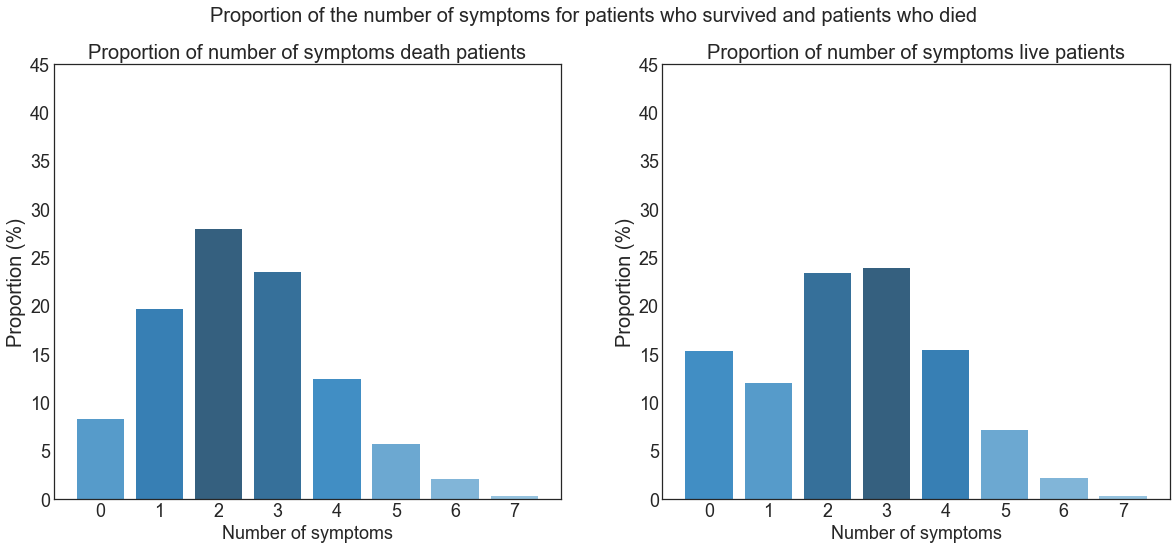

In [50]:
plt.style.use("seaborn-white")

# Create the figure and the axis
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

# Graphics
ax[0].bar(symptoms_pro2_death.index, symptoms_pro2_death["Percentage"], color = sns.color_palette("Blues_d", 10))
ax[1].bar(symptoms_pro2_live.index, symptoms_pro2_live["Percentage"], color = sns.color_palette("Blues_d", 10))

# Title, labels, ticks for ax[0]
ax[0].set_ylabel("Proportion (%)", fontsize = 20)
ax[0].set_xlabel("Number of symptoms", fontsize = 18)
ax[0].set_xticks(ticks = np.arange(0,8), labels = np.arange(0,8), fontsize = 18)
ax[0].set_yticks(ticks = np.arange(0,50, 5), labels = np.arange(0,50, 5), fontsize = 18)
ax[0].set_title("Proportion of number of symptoms death patients", fontsize = 20)
#ax[0].set_ylim((0, 210))

# Title, labels, ticks for ax[1]
ax[1].set_ylabel("Proportion (%)", fontsize = 20)
ax[1].set_xlabel("Number of symptoms", fontsize = 18)
ax[1].set_xticks(ticks = np.arange(0,8), labels = np.arange(0,8), fontsize = 18)
ax[1].set_yticks(ticks = np.arange(0,50, 5), labels = np.arange(0,50, 5), fontsize = 18)
ax[1].set_title("Proportion of number of symptoms live patients", fontsize = 20)
#ax[0].set_ylim((0, 210))

plt.suptitle("Proportion of the number of symptoms for patients who survived and patients who died", fontsize = 20)

plt.show()

<a id='2.D'></a>

## 2.D Comorbidities

In [61]:
n_comor_pro = np.round((df_covid["n_comor"].value_counts().sort_index() / df_covid.shape[0]) * 100, 2)
n_comor_pro

0    80.92
1    13.91
2     4.38
3     0.71
4     0.07
5     0.01
6     0.00
Name: n_comor, dtype: float64

It is noteworthy that 81% of patients do not have any comorbidity, perhaps because the patients are young.

Creation of the dataframe to graph.

In [62]:
n_comor_pro2 = df_covid.groupby("n_comor")[["n_comor"]].count() / df_covid.shape[0] * 100
n_comor_pro2.columns = ["Percentage"]
n_comor_pro2 = n_comor_pro2.sort_values(by = "Percentage", ascending = True).round(2)
n_comor_pro2 

,Percentage
n_comor,
6,0.00
5,0.01
4,0.07
3,0.71
2,4.38
1,13.91
0,80.92


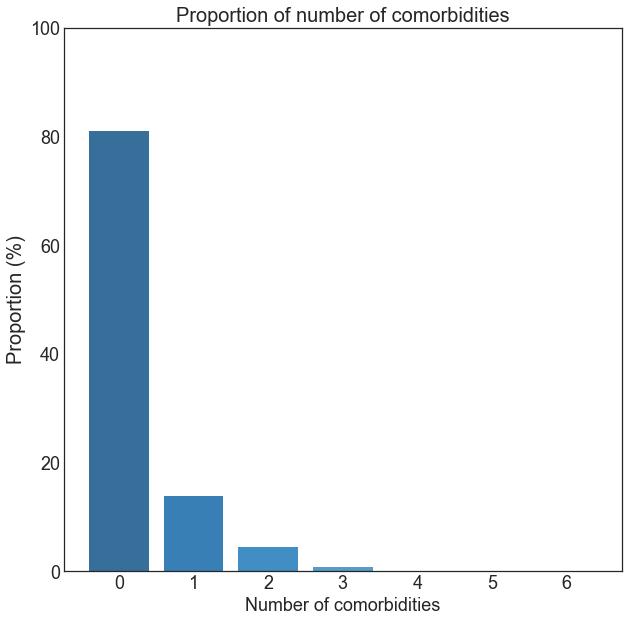

In [63]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize = (10, 10))

ax.bar(n_comor_pro2.index, n_comor_pro2["Percentage"], color = sns.color_palette("Blues_d", 10))

plt.ylabel("Proportion (%)", fontsize = 20)
plt.xlabel("Number of comorbidities", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Proportion of number of comorbidities", fontsize = 20)
plt.ylim(0, 100)

plt.show()

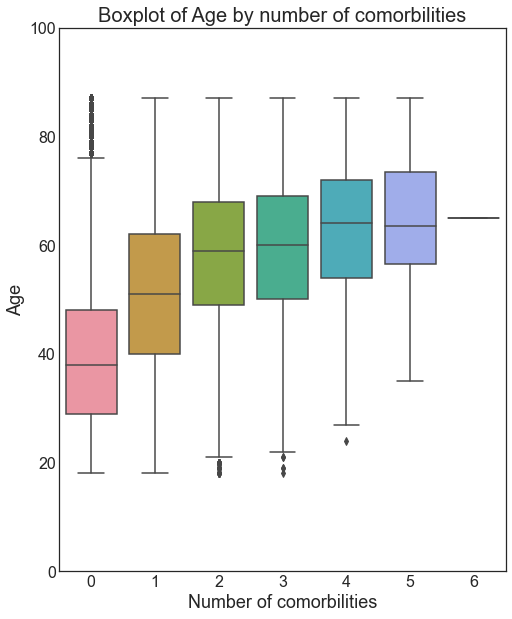

In [64]:
fig, ax = plt.subplots(figsize = (8,10))
plt.style.use("seaborn-white")
#palette = ["#d6e885", "purple"]

sns.boxplot(x = "n_comor", y = "Age", data = df_covid)

plt.title("Boxplot of Age by number of comorbilities", fontsize = 20)
plt.xlabel("Number of comorbilities", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Age", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 100)

plt.show()

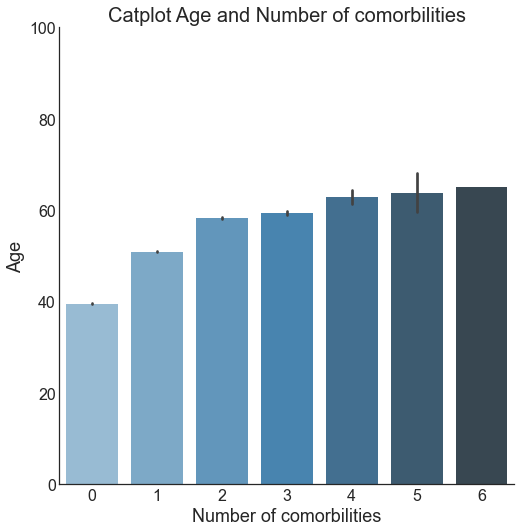

In [65]:
sns.catplot(x = "n_comor", y = "Age", data = df_covid, kind = "bar", palette = "Blues_d", height = 7)

plt.title("Catplot Age and Number of comorbilities", fontsize = 20)
plt.xlabel("Number of comorbilities", fontsize = 18)
plt.ylabel("Age", fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(0, 100)

plt.show()

As patients get older they have more comorbidities.

Creation of the data frame to graph for patients who survived.

In [66]:
comor_pro2_live = df_covid_live.groupby("n_comor")[["n_comor"]].count() / df_covid_live.shape[0] * 100
comor_pro2_live.columns = ["Percentage"]
comor_pro2_live = comor_pro2_live.sort_values(by = "Percentage", ascending = True).round(2)
comor_pro2_live  

,Percentage
n_comor,
6,0.00
5,0.01
4,0.05
3,0.55
2,3.98
1,13.62
0,81.80


Creation of the data frame to graph for patients who died.

In [67]:
comor_pro2_death = df_covid_death.groupby("n_comor")[["n_comor"]].count() / df_covid_death.shape[0] * 100
comor_pro2_death.columns = ["Percentage"]
comor_pro2_death = comor_pro2_death.sort_values(by = "Percentage", ascending = True).round(2)
comor_pro2_death  

,Percentage
n_comor,
5,0.21
4,1.38
3,8.41
2,23.90
1,28.15
0,37.95


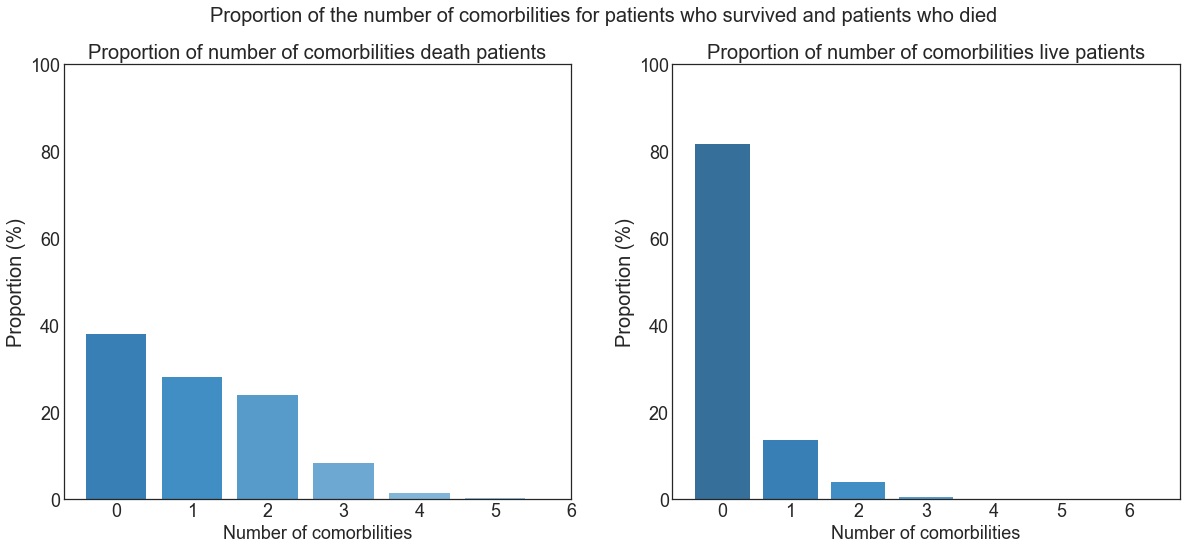

In [68]:
plt.style.use("seaborn-white")

# Create the figure and the axis
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

# Graphics
ax[0].bar(comor_pro2_death.index, comor_pro2_death["Percentage"], color = sns.color_palette("Blues_d", 10))
ax[1].bar(comor_pro2_live.index, comor_pro2_live["Percentage"], color = sns.color_palette("Blues_d", 10))

# Title, labels, ticks for ax[0]
ax[0].set_ylabel("Proportion (%)", fontsize = 20)
ax[0].set_xlabel("Number of comorbilities", fontsize = 18)
ax[0].set_xticks(ticks = np.arange(0,7), labels = np.arange(0,7), fontsize = 18)
ax[0].set_yticks(ticks = np.arange(0,120, 20), labels = np.arange(0,120, 20), fontsize = 18)
ax[0].set_title("Proportion of number of comorbilities death patients", fontsize = 20)
ax[0].set_ylim((0, 100))

# Title, labels, ticks for ax[1]
ax[1].set_ylabel("Proportion (%)", fontsize = 20)
ax[1].set_xlabel("Number of comorbilities", fontsize = 18)
ax[1].set_xticks(ticks = np.arange(0,7), labels = np.arange(0,7), fontsize = 18)
ax[1].set_yticks(ticks = np.arange(0,120, 20), labels = np.arange(0,120, 20), fontsize = 18)
ax[1].set_title("Proportion of number of comorbilities live patients", fontsize = 20)
ax[1].set_ylim((0, 100))

plt.suptitle("Proportion of the number of comorbilities for patients who survived and patients who died", fontsize = 20)

plt.show()

Patients who died had more comorbilities

<a id='2.E'></a>

## 2.E Delta_DeathReg

Outlier removal

- The elimination of outliers in `Delta_DeathReg` is performed at this point, since `Delta_DeathReg` has a high percentage of null data, since most of the patients survived. 

- Remember that when a patient survives `Delta_DeathReg` is null.

- This is why the analysis is performed on patients who died.

In [69]:
iqr_delta_death = iqr(df_covid_death["Delta_DeathReg"])
low_thres_delta_death = np.quantile(df_covid_death["Delta_DeathReg"], 0.25) - (1.5 * iqr_delta_death)
high_thres_delta_death = np.quantile(df_covid_death["Delta_DeathReg"], 0.75) + (1.5 * iqr_delta_death)

In [70]:
Delta_DeathReg = df_covid_death[(df_covid_death["Delta_DeathReg"] >= low_thres_delta_death) & (df_covid_death["Delta_DeathReg"] <= high_thres_delta_death)]

In [73]:
Delta_DeathReg["Delta_DeathReg"].describe()

count    7398.000000
mean       14.648148
std        10.150571
min         0.000000
25%         7.000000
50%        13.000000
75%        21.000000
max        44.000000
Name: Delta_DeathReg, dtype: float64

In [71]:
median_Delta_DeathReg = Delta_DeathReg["Delta_DeathReg"].median()

percentile25_Delta_DeathReg = np.percentile(Delta_DeathReg["Delta_DeathReg"], 25)

percentile75_Delta_DeathReg = np.percentile(Delta_DeathReg["Delta_DeathReg"], 75)

print(f"The median of median Delta_DeathReg of the patients was {median_Delta_DeathReg:.2f} {(percentile25_Delta_DeathReg, percentile75_Delta_DeathReg)}")

The median of median Delta_DeathReg of the patients was 13.00 (7.0, 21.0)


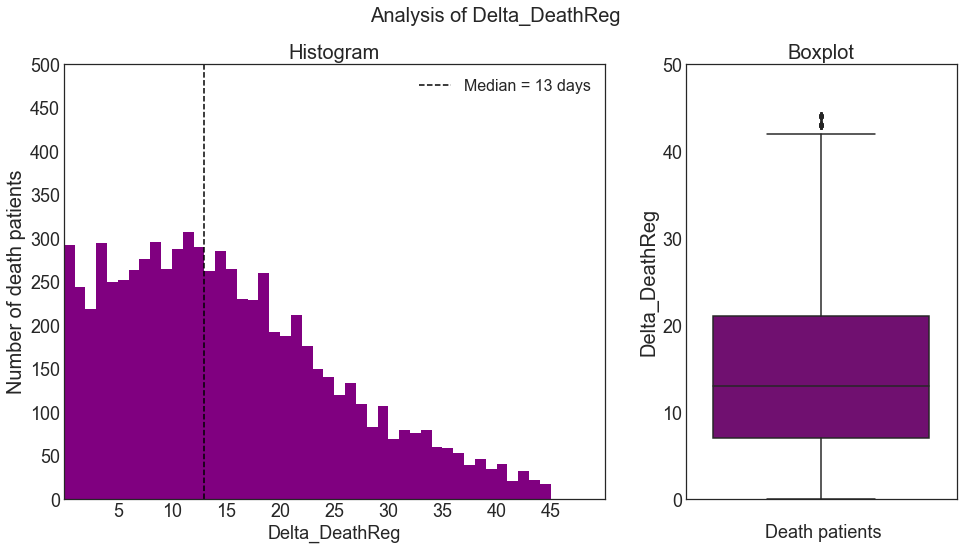

In [72]:
plt.style.use("seaborn-white")
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(16)
 
spec = gridspec.GridSpec(ncols = 2, nrows = 1, width_ratios = [2, 1], wspace = 0.2, hspace = 0.1)

ax0 = fig.add_subplot(spec[0])
ax1 = fig.add_subplot(spec[1])

# Graphics
ax0.hist(Delta_DeathReg["Delta_DeathReg"], color = "purple", bins = np.arange(0, 50, 1))
ax1 = sns.boxplot(x = "Evolution", y = "Delta_DeathReg", data = Delta_DeathReg, color = "purple")

# Title, labels, ticks for ax[0]
ax0.set_ylabel("Number of death patients", fontsize = 20)
ax0.set_xlabel("Delta_DeathReg", fontsize = 18)
ax0.set_xticks(ticks = np.arange(5, 50, 5), labels = np.arange(5, 50, 5), fontsize = 18)
ax0.set_yticks(ticks = np.arange(0, 550, 50), labels = np.arange(0, 550, 50), fontsize = 18)
ax0.set_ylim((0, 500))
ax0.set_xlim((0, 50))
ax0.set_title("Histogram", fontsize = 20)
ax0.axvline(x = Delta_DeathReg["Delta_DeathReg"].median(), color = "black", linestyle = "--", label = "Median = 13 days")
ax0.legend(fontsize = 16)

# Title, labels, ticks for ax[1]
ax1.set_ylabel("Delta_DeathReg", fontsize = 20)
ax1.set_xlabel("\n Death patients", fontsize = 18)
ax1.set_xticks([])
ax1.set_yticks(ticks = np.arange(0, 60, 10), labels = np.arange(0, 60, 10), fontsize = 18)
ax1.set_ylim((0, 50))
ax1.set_title("Boxplot", fontsize = 20)

plt.suptitle("Analysis of Delta_DeathReg", fontsize = 20)

plt.show()

<a id='2.F'></a>

## 2.F Hospitalized

In [74]:
hospitalized_null = df_covid["Hospitalized"].isna().sum() / df_covid.shape[0] * 100
print(f"Percentage of nulls in 'Hospitalized column': {round(hospitalized_null, 2)}%")

Percentage of nulls in 'Hospitalized column': 53.62%


In [75]:
hospitalized = df_covid.dropna(subset = "Hospitalized")

In [76]:
hospitalized_yes = hospitalized[hospitalized["Hospitalized"] == "Yes"]

In [77]:
hospitalized_yes.shape

(5955, 30)

In [78]:
hospitalized_yes_pct = round((hospitalized_yes.shape[0] / hospitalized.shape[0] * 100), 2)
print(f"Percentage of patients hospitalized: {hospitalized_yes_pct}%.")

Percentage of patients hospitalized: 3.34%.


In [79]:
mask_hospitalized_cured = hospitalized_yes["Evolution"] == "Cured"
mask_hospitalized_death = hospitalized_yes["Evolution"] == "Death"

hospitalized_cured = round((hospitalized_yes[mask_hospitalized_cured].shape[0] / hospitalized_yes.shape[0] * 100), 2)
hospitalized_death = round((hospitalized_yes[mask_hospitalized_death].shape[0] / hospitalized_yes.shape[0] * 100), 2)

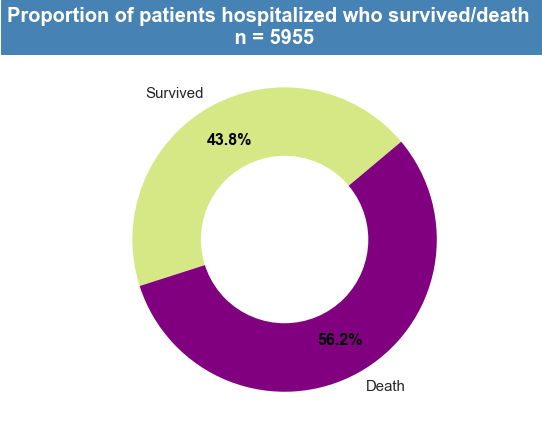

In [80]:
# Creating plot
fig, ax = plt.subplots(figsize = (10, 7))
  
# Creating dataset
data = [hospitalized_cured, hospitalized_death]
labels = ["Survived", "Death"]
explode = (0.1, 0) 

textprops = {"fontsize": 15}
_, _, autopcts = ax.pie(data, labels = labels, autopct = '%1.1f%%', pctdistance = 0.75, textprops = textprops,
                       shadow = False, startangle = 40, colors = ("#d6e885", "purple"))

centre_circle = plt.Circle((0, 0), 0.55, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize': 16})
plt.title("Proportion of patients hospitalized who survived/death \n n = 5955", position = (.465, 1), backgroundcolor = "steelblue", color = "white", fontsize = 20, weight = "bold")

plt.show()

<a id='2.G'></a>

## 2.G Pregnant

In [81]:
pregnant_null = df_covid["Pregnant"].isna().sum() / df_covid.shape[0] * 100
print(f"Percentage of nulls in 'Pregnant' column: {round(pregnant_null, 2)}%")

Percentage of nulls in 'Pregnant' column: 46.41%


In [82]:
pregnant = df_covid.dropna(subset = "Pregnant")

In [83]:
pregnant_yes = pregnant[pregnant["Pregnant"] == "Yes"]

In [84]:
pregnant_yes.shape

(2059, 30)

In [85]:
pregnant_yes_pct = round((pregnant_yes.shape[0] / pregnant.shape[0] * 100), 2)
print(f"Percentage of patients pregnant: {pregnant_yes_pct}%.")

Percentage of patients pregnant: 1.0%.


In [86]:
mask_pregnant_cured = pregnant_yes["Evolution"] == "Cured"
mask_pregnant_death = pregnant_yes["Evolution"] == "Death"

pregnant_cured = round((pregnant_yes[mask_pregnant_cured].shape[0] / pregnant_yes.shape[0] * 100), 2)
pregnant_death = round((pregnant_yes[mask_pregnant_death].shape[0] / pregnant_yes.shape[0] * 100), 2)

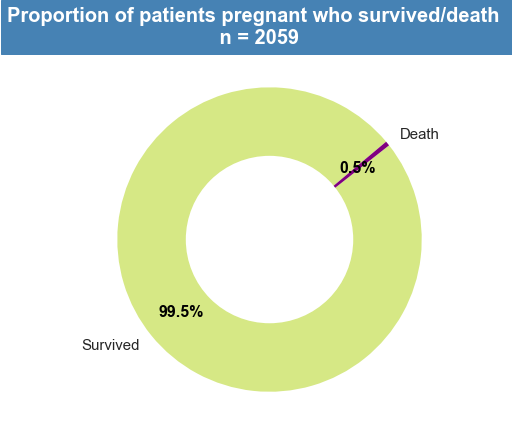

In [87]:
# Creating plot
fig, ax = plt.subplots(figsize = (10, 7))
  
# Creating dataset
data = [pregnant_cured, pregnant_death]
labels = ["Survived", "Death"]
explode = (0.1, 0) 

textprops = {"fontsize": 15}
_, _, autopcts = ax.pie(data, labels = labels, autopct = '%1.1f%%', pctdistance = 0.75, textprops = textprops,
                       shadow = False, startangle = 40, colors = ("#d6e885", "purple"))

centre_circle = plt.Circle((0, 0), 0.55, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize': 16})
plt.title("Proportion of patients pregnant who survived/death \n n = 2059", position = (.465, 1), backgroundcolor = "steelblue", color = "white", fontsize = 20, weight = "bold")

plt.show()

Hospitalized pregnant sub analysis

In [88]:
hospitalized_yes.head(2)

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Race,...,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag,Delta_DeathReg,Age,n_comor,n_symp
17,2021-11-08,2021-11-04,2021-11-09,NaN,Positive,Confirmed,Yes,Death,Masculine,Brown,...,No,No,No,No,No,4,1.0,52.0,0,3
137,2021-11-05,2021-11-01,NaT,NaN,Positive,Confirmed,Yes,Cured,Femenine,White,...,Yes,No,No,No,No,4,NaN,87.0,1,1


In [89]:
hospitalized_yes.shape

(5955, 30)

Pregnant women who were hospitalized

In [90]:
mask_pregnant_hospitalized  = hospitalized_yes["Pregnant"] == "Yes"

pregnant_hospitalized = hospitalized_yes[mask_pregnant_hospitalized]

In [91]:
pregnant_hospitalized.shape

(16, 30)

In [92]:
mask_pregnant_hospitalized_cured = pregnant_hospitalized["Evolution"] == "Cured"
mask_pregnant_hospitalized_death = pregnant_hospitalized["Evolution"] == "Death"

pregnant_hospitalized_cured = round((pregnant_hospitalized[mask_pregnant_hospitalized_cured].shape[0] / pregnant_hospitalized.shape[0] * 100), 2)
pregnant_hospitalized_death = round((pregnant_hospitalized[mask_pregnant_hospitalized_death].shape[0] / pregnant_hospitalized.shape[0] * 100), 2)

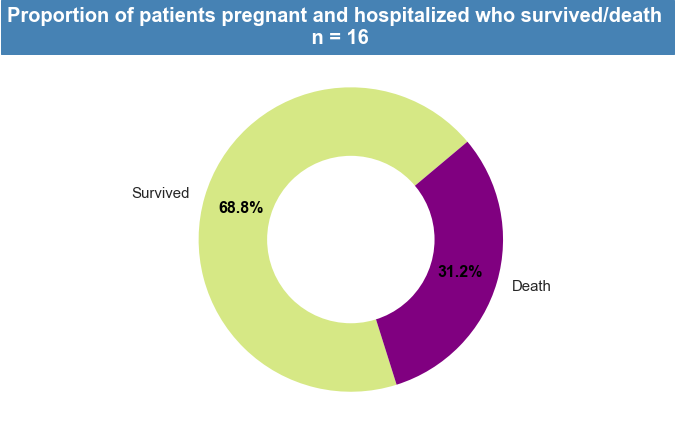

In [93]:
# Creating plot
fig, ax = plt.subplots(figsize = (10, 7))
  
# Creating dataset
data = [pregnant_hospitalized_cured, pregnant_hospitalized_death]
labels = ["Survived", "Death"]
explode = (0.1, 0) 

textprops = {"fontsize": 15}
_, _, autopcts = ax.pie(data, labels = labels, autopct = '%1.1f%%', pctdistance = 0.75, textprops = textprops,
                       shadow = False, startangle = 40, colors = ("#d6e885", "purple"))

centre_circle = plt.Circle((0, 0), 0.55, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize': 16})
plt.title("Proportion of patients pregnant and hospitalized who survived/death \n n = 16", position = (.465, 1), backgroundcolor = "steelblue", color = "white", fontsize = 20, weight = "bold")

plt.show()

<a id='2.H'></a>

## 2.H Race

In [94]:
df_covid.columns

Index(['Register_date', 'Diagnosis_date', 'Death_date', 'Result_PCR',
       'Result_RapidTest', 'Classification', 'Hospitalized', 'Evolution',
       'Gender', 'Race', 'Pregnant', 'Disabled', 'Fever', 'Breath_difficulty',
       'Cough', 'Rhinitis', 'Throat_pain', 'Diarrhea', 'Headache',
       'Comorbidity_pulmonary', 'Comorbidity_cardiac', 'Comorbidity_renal',
       'Comorbidity_diabetes', 'Comorbidity_smoking', 'Comorbidity_obesity',
       'Delta_RegDiag', 'Delta_DeathReg', 'Age', 'n_comor', 'n_symp'],
      dtype='object')

In [95]:
race_pro = np.round((df_covid["Race"].value_counts().sort_index() / df_covid.shape[0]) * 100, 2)
race_pro

Black          5.87
Brown         33.88
Indigenous     0.14
White         31.95
Yellow         6.77
Name: Race, dtype: float64

- Almost 65% of the patients are Brown or White.

Creation of the dataframe to graph.

In [96]:
race_pro_pro2 = df_covid.groupby("Race")[["Race"]].count() / df_covid.shape[0] * 100
race_pro_pro2.columns = ["Percentage"]
race_pro_pro2 = race_pro_pro2.sort_values(by = "Percentage", ascending = True).round(2)
race_pro_pro2  

,Percentage
Race,
Indigenous,0.14
Black,5.87
Yellow,6.77
White,31.95
Brown,33.88


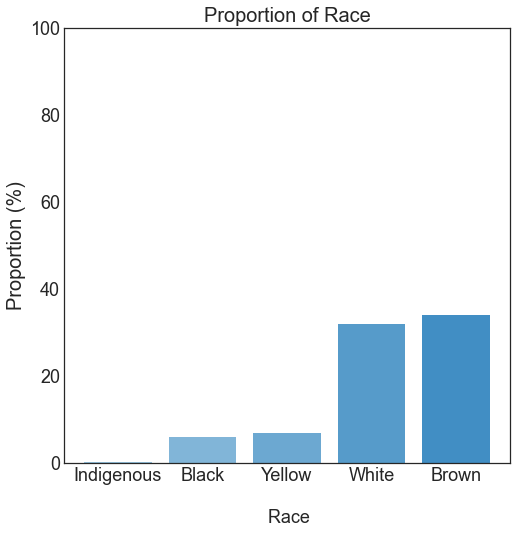

In [97]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize = (8, 8))

ax.bar(race_pro_pro2.index, race_pro_pro2["Percentage"], color = sns.color_palette("Blues_d", 10))

plt.ylabel("Proportion (%)", fontsize = 20)
plt.xlabel("\n Race", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Proportion of Race", fontsize = 20)
plt.ylim(0, 100)

plt.show()

In [98]:
race_pro2_death = df_covid_death.groupby("Race")[["Race"]].count() / df_covid_death.shape[0] * 100
race_pro2_death.columns = ["Percentage"]
race_pro2_death = race_pro2_death.sort_values(by = "Percentage", ascending = True).round(2)
race_pro2_death  

,Percentage
Race,
Indigenous,0.12
Black,7.39
Yellow,8.15
White,33.59
Brown,35.29


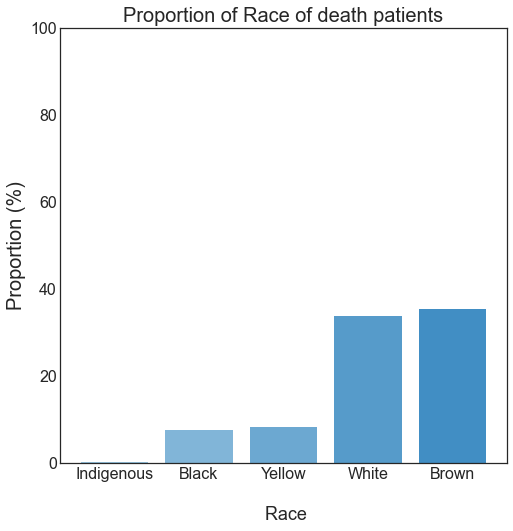

In [99]:
plt.style.use("seaborn-white")

# Create the figure and the axis
fig, ax = plt.subplots(figsize = (8, 8))

plt.bar(race_pro2_death.index, race_pro2_death["Percentage"], color = sns.color_palette("Blues_d", 10))

plt.title("Proportion of Race of death patients", fontsize = 20)
plt.ylabel("Proportion (%)", fontsize = 20)
plt.xlabel("\n Race", fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim((0, 100))

plt.show()

<a id='2.I'></a>

## 2.I Cases by date

In [100]:
dates = df_covid.copy()

In [101]:
dates["year"] = dates["Register_date"].dt.year
dates["month"] = dates["Register_date"].dt.month
dates["day"] = dates["Register_date"].dt.day

In [102]:
dates_group = dates.groupby(["year", "month"])["Classification"].count()
dates_group

year  month
2020  3           15
      4         2764
      5        11253
      6        17709
      7        20053
      8        12594
      9        11304
      10       18194
      11       30876
      12       34714
2021  1        28114
      2        19943
      3        41685
      4        32041
      5        27840
      6        20425
      7        13497
      8        12607
      9        15806
      10       12293
      11         771
Name: Classification, dtype: int64

In [103]:
n_cases20 = dates[dates["year"] == 2020].groupby(["year", "month"])["Classification"].count().sum()
n_cases21 = dates[dates["year"] == 2021].groupby(["year", "month"])["Classification"].count().sum()

In [104]:
dates_ticks = np.arange(0, 21, 1)
dates_labels = ["03-20", "04-20", "05-20", "06-20", "07-20", "08-20", "09-20", "10-20", "11-20", "12-20", 
          "01-21", "02-21", "03-21", "04-21", "05-21", "06-21", "07-21", "08-21", "09-21", "10-21", "11-21"]

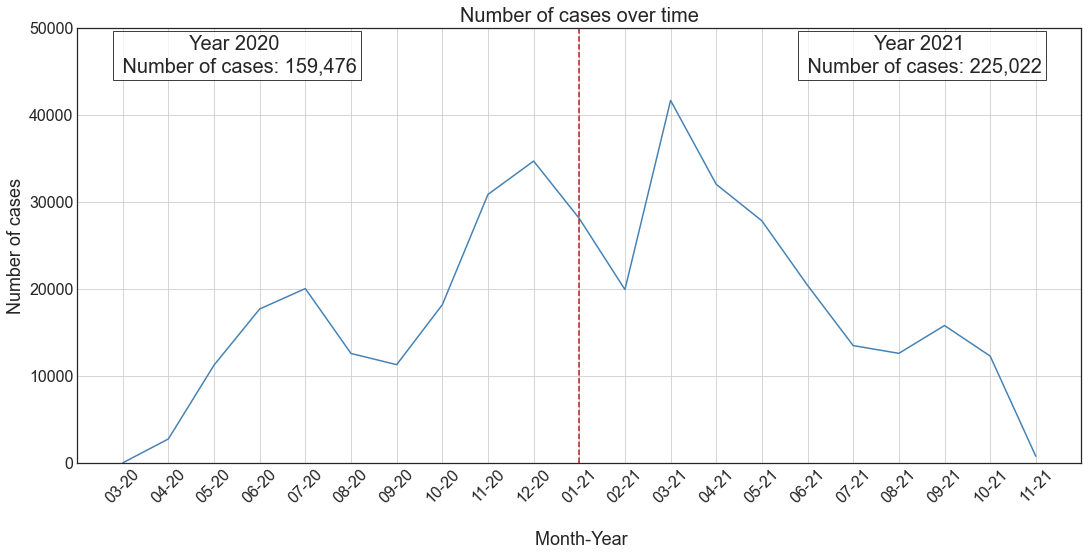

In [105]:
# Create the figure and the axis
fig, ax = plt.subplots(figsize = (8, 10))
plt.style.use("seaborn-whitegrid")

# Graphic
dates_group.plot(color = "steelblue", figsize = (18, 8))

# Title, labels, ticks, etc
plt.xlabel("\n Month-Year", fontsize = 18)
plt.xticks(ticks = dates_ticks, labels = dates_labels, fontsize = 16, rotation = 45)
plt.ylabel("Number of cases", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 50000)
plt.title("Number of cases over time", fontsize = 20)

ax.axvline(x = 10, color = "firebrick", linestyle = "--", label = "Mean")
ax.text(2.5, 45000, f"Year 2020 \n Number of cases: {n_cases20:,}", ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))
ax.text(17.5, 45000, f"Year 2021 \n Number of cases: {n_cases21:,}", ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))

plt.show()

In [106]:
dates_death = dates[dates["Evolution"] == "Death"]
dates_group_death = dates_death.groupby(["year", "month"])["Classification"].count()
n_deaths20 = dates_death[dates_death["year"] == 2020].groupby(["year", "month"])["Classification"].count().sum()
n_deaths21 = dates_death[dates_death["year"] == 2021].groupby(["year", "month"])["Classification"].count().sum()

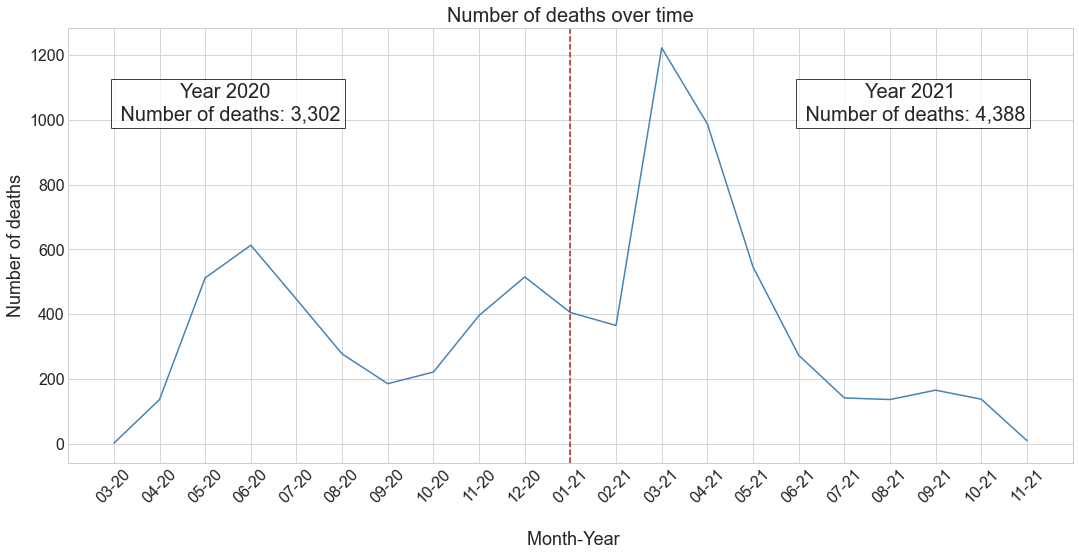

In [107]:
# Create the figure and the axis
fig, ax = plt.subplots(figsize = (8, 10))
plt.style.use("seaborn-whitegrid")

# Graphic
dates_group_death.plot(color = "steelblue", figsize = (18, 8))

# Title, labels, ticks, etc
plt.xlabel("\n Month-Year", fontsize = 18)
plt.xticks(ticks = dates_ticks, labels = dates_labels, fontsize = 16, rotation = 45)
plt.ylabel("Number of deaths", fontsize = 18)
plt.yticks(fontsize = 16)
#plt.ylim(0, 5000)
plt.title("Number of deaths over time", fontsize = 20)

ax.axvline(x = 10, color = "firebrick", linestyle = "--", label = "Mean")
ax.text(2.5, 1000, f"Year 2020 \n Number of deaths: {n_deaths20:,}", ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))
ax.text(17.5, 1000, f"Year 2021 \n Number of deaths: {n_deaths21:,}", ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))

plt.show()

In [109]:
dates_death_march21 = dates[(dates["Evolution"] == "Death") & (dates["year"] == 2021) & (dates["month"] == 3)]
dates_group_death_march21 = dates_death_march21.groupby(["day"])["Classification"].count()
n_deaths_march21 = dates_death[dates_death["month"] == 3].groupby(["day"])["Classification"].count().sum()

In [110]:
n_deaths_march21.max()

1224

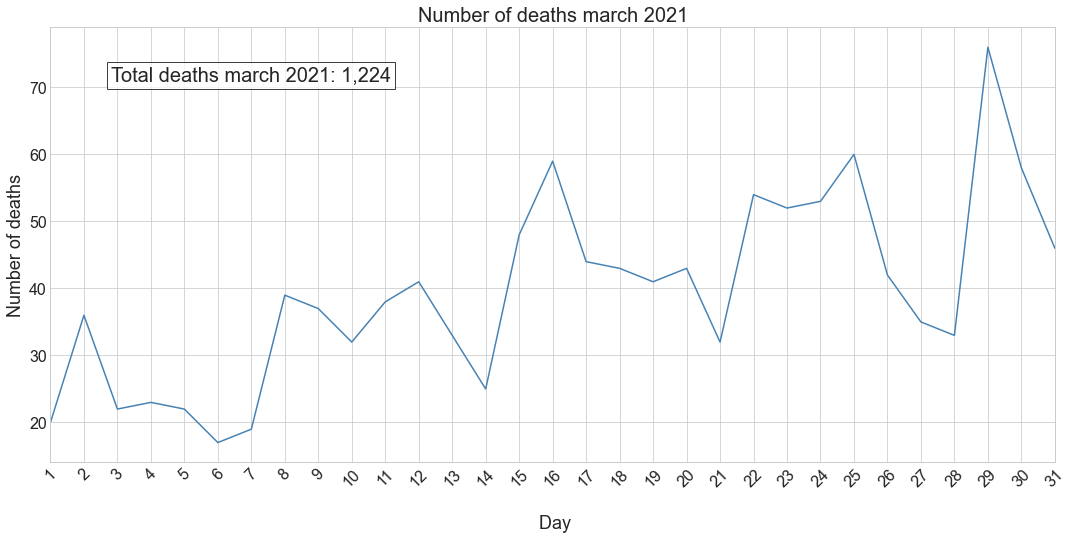

In [111]:
# Create the figure and the axis
fig, ax = plt.subplots(figsize = (8, 10))
plt.style.use("seaborn-whitegrid")

# Graphic
dates_group_death_march21.plot(color = "steelblue", figsize = (18, 8))

# Title, labels, ticks, etc
plt.title("Number of deaths march 2021", fontsize = 20)
plt.xlabel("\n Day", fontsize = 18)
plt.xlim(1, 31)
plt.xticks(ticks = np.arange(1,32,1), labels = np.arange(1,32,1), fontsize = 16, rotation = 45)
plt.ylabel("Number of deaths", fontsize = 18)
plt.yticks(fontsize = 16)

ax.text(7, 71, f"Total deaths march 2021: {n_deaths_march21:,}", ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))

plt.show()

- https://saude.estadao.com.br/noticias/geral,brasil-tem-1969-mortes-registradas-pela-covid-em-24h-e-media-movel-fica-em-2655,70003664575
- https://saude.estadao.com.br/noticias/geral,brasil-bate-novo-recorde-com-3950-mortes-por-covid-em-24h-obitos-em-marco-chegam-a-66-8-mil,70003667014

<a id='2.J'></a>

## 2.J Correlations

Correlation between Delta_RegDiag and number of deaths

In [112]:
Delta_Evol = df_covid_death[["Delta_RegDiag", "Evolution"]]

In [113]:
Delta_Evol_group = Delta_Evol.groupby(["Delta_RegDiag"])["Evolution"].count()
to_corr = Delta_Evol_group.reset_index()
to_corr

,Delta_RegDiag,Evolution
0,0,498
1,1,709
2,2,854
3,3,1341
4,4,1355
5,5,1105
6,6,944
7,7,884


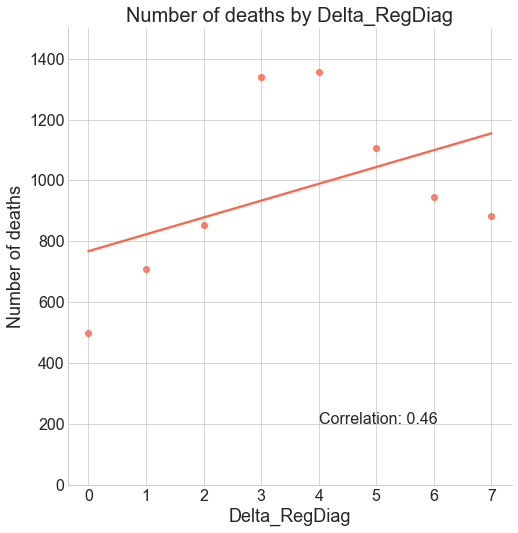

In [114]:
sns.lmplot(x = "Delta_RegDiag", y = "Evolution", data = to_corr, height = 7, ci = None)

plt.title("Number of deaths by Delta_RegDiag", fontsize = 20)
plt.yticks(fontsize = 16)
plt.ylabel("Number of deaths", fontsize = 18)
plt.ylim(0, 1500)
plt.xlabel("Delta_RegDiag", fontsize = 18)
plt.xticks(fontsize = 16)
to_corr["Delta_RegDiag"].corr(to_corr["Evolution"])
plt.text(4, 200, f"Correlation: {to_corr['Delta_RegDiag'].corr(to_corr['Evolution']):.2}", fontsize = 16)

plt.show()

In [115]:
# https://www.statology.org/quadratic-regression-python/
# define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y) / len(y)
    ssreg = np.sum((yhat - ybar) ** 2)
    sstot = np.sum((y - ybar) ** 2)
    results["r_squared"] = ssreg / sstot

    return results

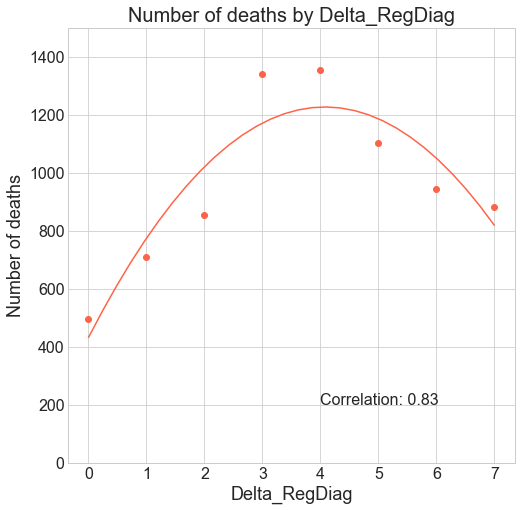

In [116]:
fig, ax = plt.subplots(figsize = (8,8))

#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(to_corr["Delta_RegDiag"], to_corr["Evolution"], 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(0, 7, 30)
plt.scatter(to_corr["Delta_RegDiag"], to_corr["Evolution"])
plt.plot(polyline, model(polyline))

# Title, labels, ticks, etc.
plt.title("Number of deaths by Delta_RegDiag", fontsize = 20)
plt.yticks(fontsize = 16)
plt.ylabel("Number of deaths", fontsize = 18)
plt.ylim(0, 1500)
plt.xlabel("Delta_RegDiag", fontsize = 18)
plt.xticks(fontsize = 16)

corr_2 = polyfit(to_corr["Delta_RegDiag"], to_corr["Evolution"], 2)
plt.text(4, 200, f"Correlation: {corr_2['r_squared']:.2}", fontsize = 16)

plt.show()

In [117]:
Delta_Age = df_covid_death[["Delta_RegDiag", "Age", "Gender"]]

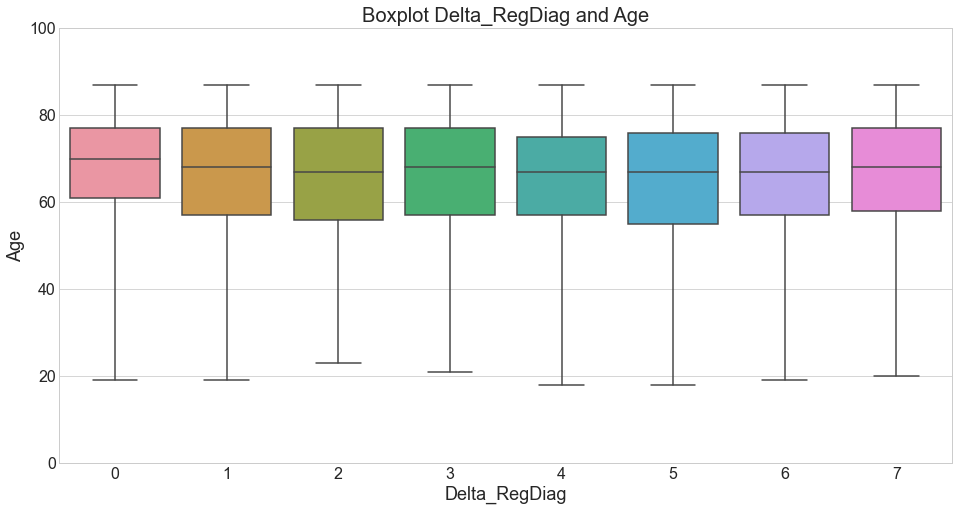

In [119]:
fig, ax = plt.subplots(figsize = (16, 8))
colours = ["#66CDAA", "#ff6347"]
sns.set_palette(sns.color_palette(colours))

sns.boxplot(x = "Delta_RegDiag", y = "Age", data = Delta_Age,  whis = 10)

plt.title("Boxplot Delta_RegDiag and Age", fontsize = 20)
plt.xlabel("Delta_RegDiag", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Age", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 100)

plt.show()

Although with a Delta_RegDiag of 3 or 4 there are more cases of death, it is not observed that these patients are older.

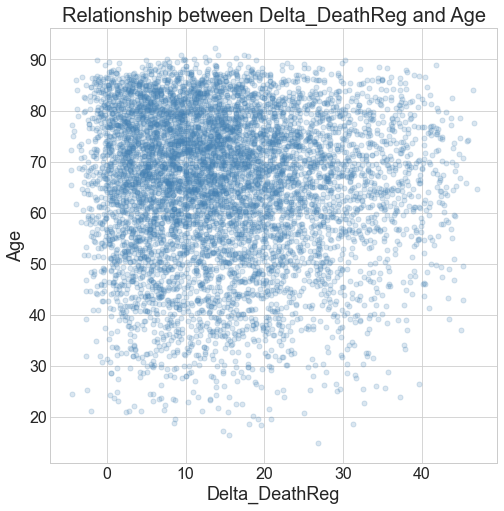

In [120]:
fig, ax = plt.subplots(figsize = (8, 8))

Delta_DeathReg_plot = Delta_DeathReg["Delta_DeathReg"] + np.random.normal(0, 2, size = len(Delta_DeathReg))
Age_plot = Delta_DeathReg["Age"] + np.random.normal(0, 2, size = len(Delta_DeathReg))

plt.plot(Delta_DeathReg_plot, Age_plot, "o", alpha = 0.2, markersize = 5, color = "steelblue") 

plt.title("Relationship between Delta_DeathReg and Age", fontsize = 20)
plt.xlabel("Delta_DeathReg", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Age", fontsize = 18)
plt.yticks(fontsize = 16)

plt.show()

A higher concentration of patients who die within the first 20 days of the date of diagnosis is observed, these patients being older.

# 5. Conclusion

- The original dataset had 2,209,062 patients, of which 384,498 met the inclusion criteria.


- 54% (n = 205,832) were female. Median age for both women and man was 40.0 (30.0, 52.0).


- 53% of the data on hospitalization column was null. It was observed that 3.34% (n = 5955) of the patients were hospitalized and 56% of them died. The median of age of the patients who were hospitalized was 64.00 (52.0, 74.0).


- 42% of the patients had a positive rapid test and a negative PCR.


- Of the included patients 2.00% (7,690) died, and 56.00% (4,310) were male. The median of age of the patients who die was 68.00 (57.0, 76.0).


- Almost half of the patients have between 2 and 3 symptoms. 15% of patients do not have any symptoms.


- It was observed that deceased patients had a greater number of comorbidities.


- The median of median Delta_DeathReg of the patients was 13.00 (7.0, 21.0).


- Only 1% (n = 2059) of the patients were pregnant. A small analysis on this subgroup showed that only 1% died.


- Regarding the number of cases, a total of 159,475 were observed in 2020 and a total of 225,022 in 2021.


- The largest peak was observed in March 2021. This peak was also observed for the subgroup of patients who died. 03/29 was the day with the highest number of deaths: 1,224.